# Machine Health Prediction

The aim is to find whether a machine is going to breakdown in near future or not based on the some parameters. 

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("predictive_maintenance.csv")

In [2]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9992 non-null   float64
 4   Process temperature [K]  9996 non-null   float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [5]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

# Data Preparation 

In [6]:
data.isnull().sum() #Checking the null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        8
Process temperature [K]    4
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
#Replacing the null values
mean=data["Air temperature [K]"].mean()
data["Air temperature [K]"].fillna(value=mean,inplace=True)

mean1=data["Process temperature [K]"].mean()
data["Process temperature [K]"].fillna(value=mean1,inplace=True)

In [8]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
#Finding the instances where the target is 0 but failure type is not "No failure"

mismatched=data[(data["Target"] == 0) & (data["Failure Type"] != "No Failure")]
mismatched.reset_index(drop=True)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
2,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
3,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
4,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
5,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
6,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
7,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
8,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
9,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [10]:
#Finding the instances where the target is 1 but failure type is "No failure"

mismatched1=data[(data["Target"] == 1) & (data["Failure Type"] == "No Failure")]
mismatched1.reset_index(drop=True)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
1,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
2,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
3,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
4,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
7,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
8,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [11]:
#Changing the values of mismatched outputs

data.loc[data["Failure Type"] == "Random Failures","Target"]=1
data.loc[data["Failure Type"] == "No Failure","Target"] = 0

In [12]:
# Checking whether they are replaced or not

mismatched=data[(data["Target"] == 0) & (data["Failure Type"] != "No Failure")]
mismatched

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [13]:
mismatched1=data[(data["Target"] == 1) & (data["Failure Type"] == "No Failure")]
mismatched1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [14]:
data["Target"].value_counts()

0    9652
1     348
Name: Target, dtype: int64

In [15]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

array([[<AxesSubplot:title={'center':'UDI'}>,
        <AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>,
        <AxesSubplot:title={'center':'Tool wear [min]'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

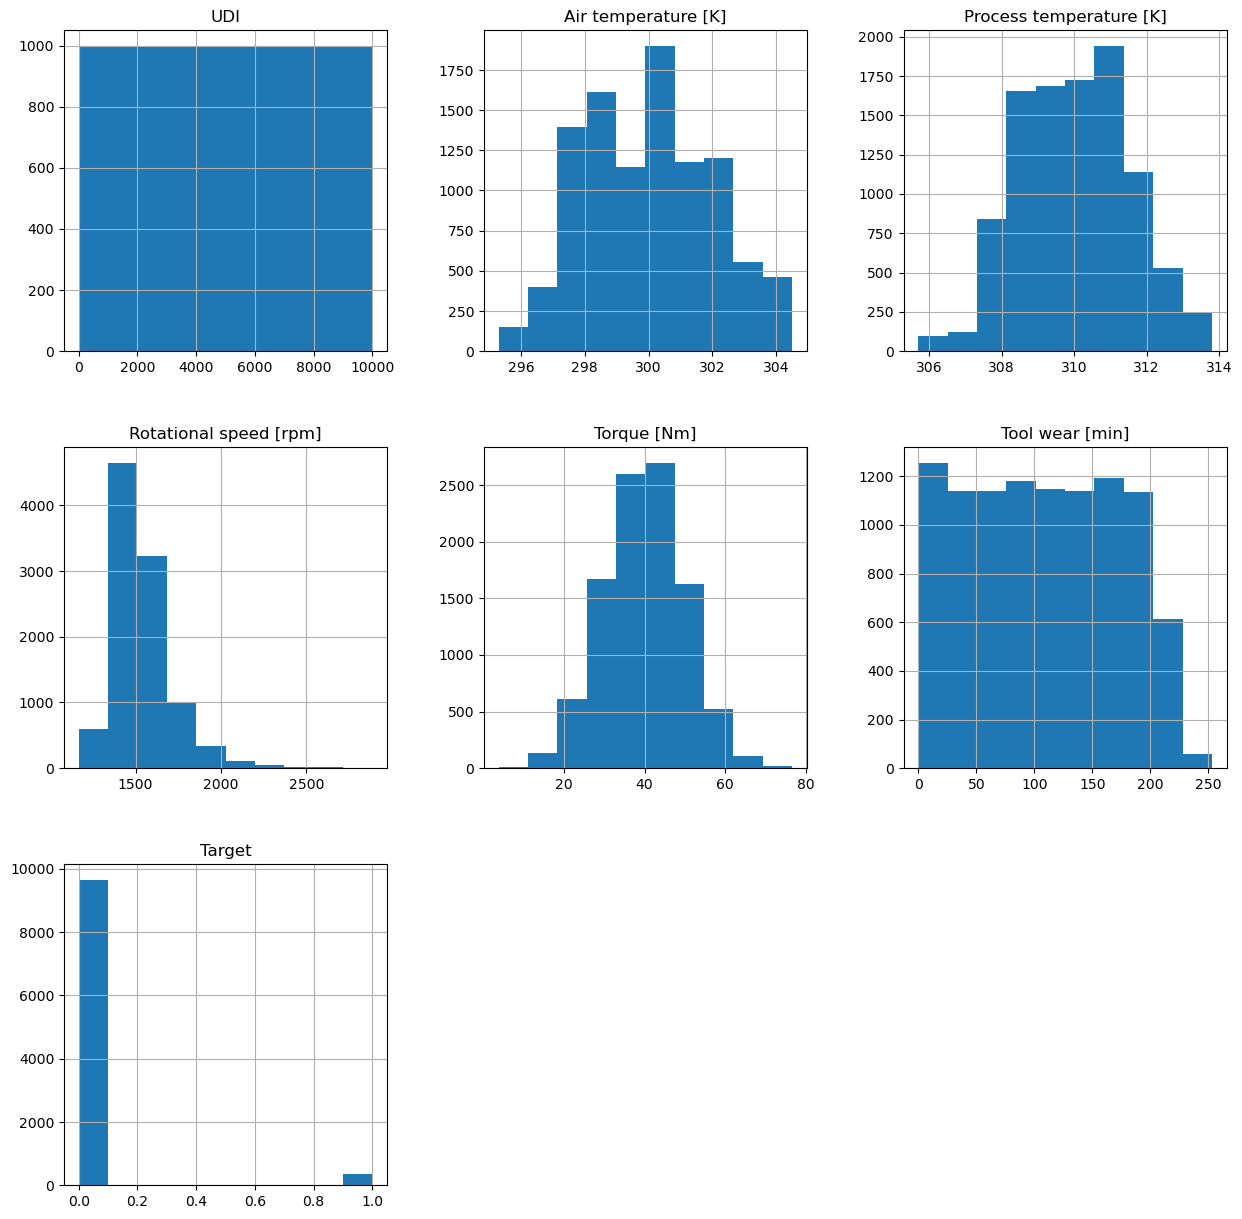

In [16]:
data.hist(figsize=(15,15))

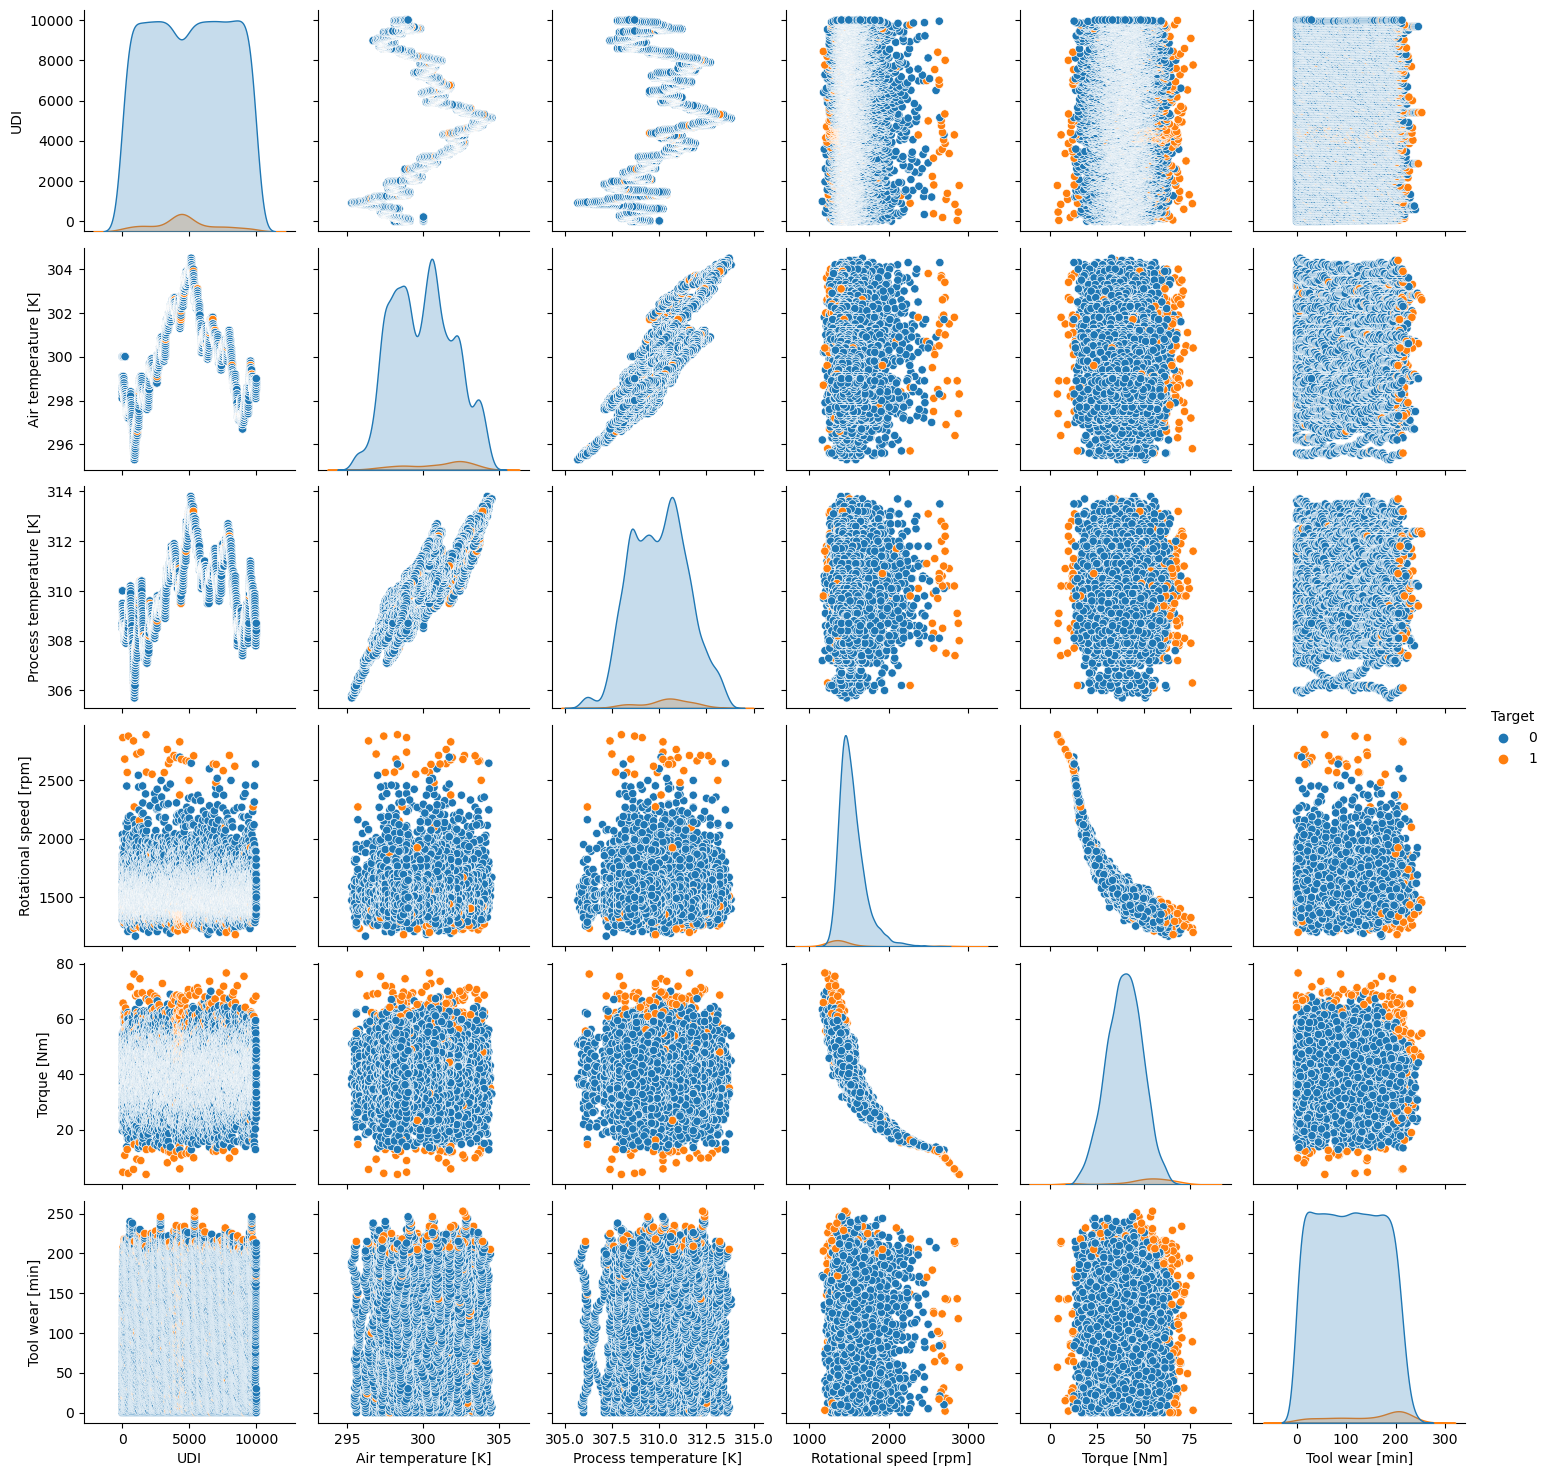

In [17]:
sns.pairplot(data,hue="Target")

In [18]:
# Resampling the data
from sklearn.utils import resample

failure1=data[data["Target"] == 1].reset_index(drop=True)
failure0=data[data["Target"] == 0].reset_index(drop=True)

#Over Sampling minority class
data_oversampled = resample(failure1,replace=True,n_samples=3000)

modified_data=pd.concat([failure0,data_oversampled])

In [19]:
#After resampling target values

modified_data["Target"].value_counts()

0    9652
1    3000
Name: Target, dtype: int64

In [20]:
modified_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [21]:
modified_data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
301,7670,L54849,L,300.7,311.8,1336,58.4,189,1,Overstrain Failure
316,8246,M23105,M,299.0,310.3,1303,68.6,111,1,Power Failure
187,4557,M19416,M,302.7,310.6,1349,51.2,6,1,Heat Dissipation Failure
96,3794,L50973,L,302.3,310.9,1379,49.3,34,1,Heat Dissipation Failure
38,1336,L48515,L,299.0,310.4,1371,53.8,228,1,Overstrain Failure


In [22]:
#Shuffling the modified data
from sklearn.utils import shuffle

shuffled_data=shuffle(modified_data)
shuffled_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2341,2406,L49585,L,299.1,308.7,1498,38.9,181,0,No Failure
3273,3359,L50538,L,301.5,310.6,1522,36.6,202,0,No Failure
5232,5482,L52661,L,302.6,312.0,1781,28.5,196,0,No Failure
8790,9122,L56301,L,297.3,308.3,1396,45.9,64,0,No Failure
1486,1531,L48710,L,298.1,309.0,1497,40.5,58,0,No Failure


In [23]:
#Failure types after over sampling

shuffled_data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     974
Power Failure                829
Overstrain Failure           675
Tool Wear Failure            358
Random Failures              164
Name: Failure Type, dtype: int64

# Visualization

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

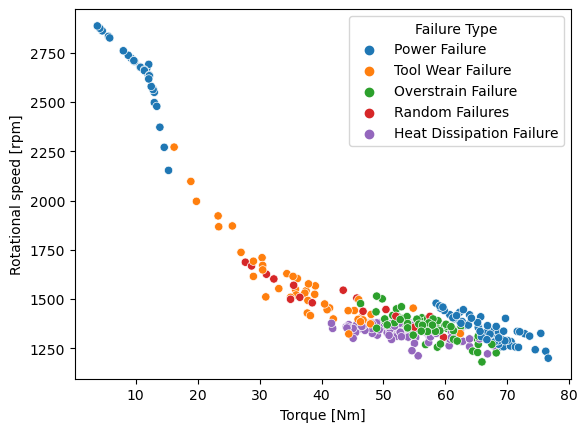

In [24]:
#Analysing Failure Types 
sns.scatterplot(data=failure1, x=failure1['Torque [Nm]'],y=failure1['Rotational speed [rpm]'],hue="Failure Type")

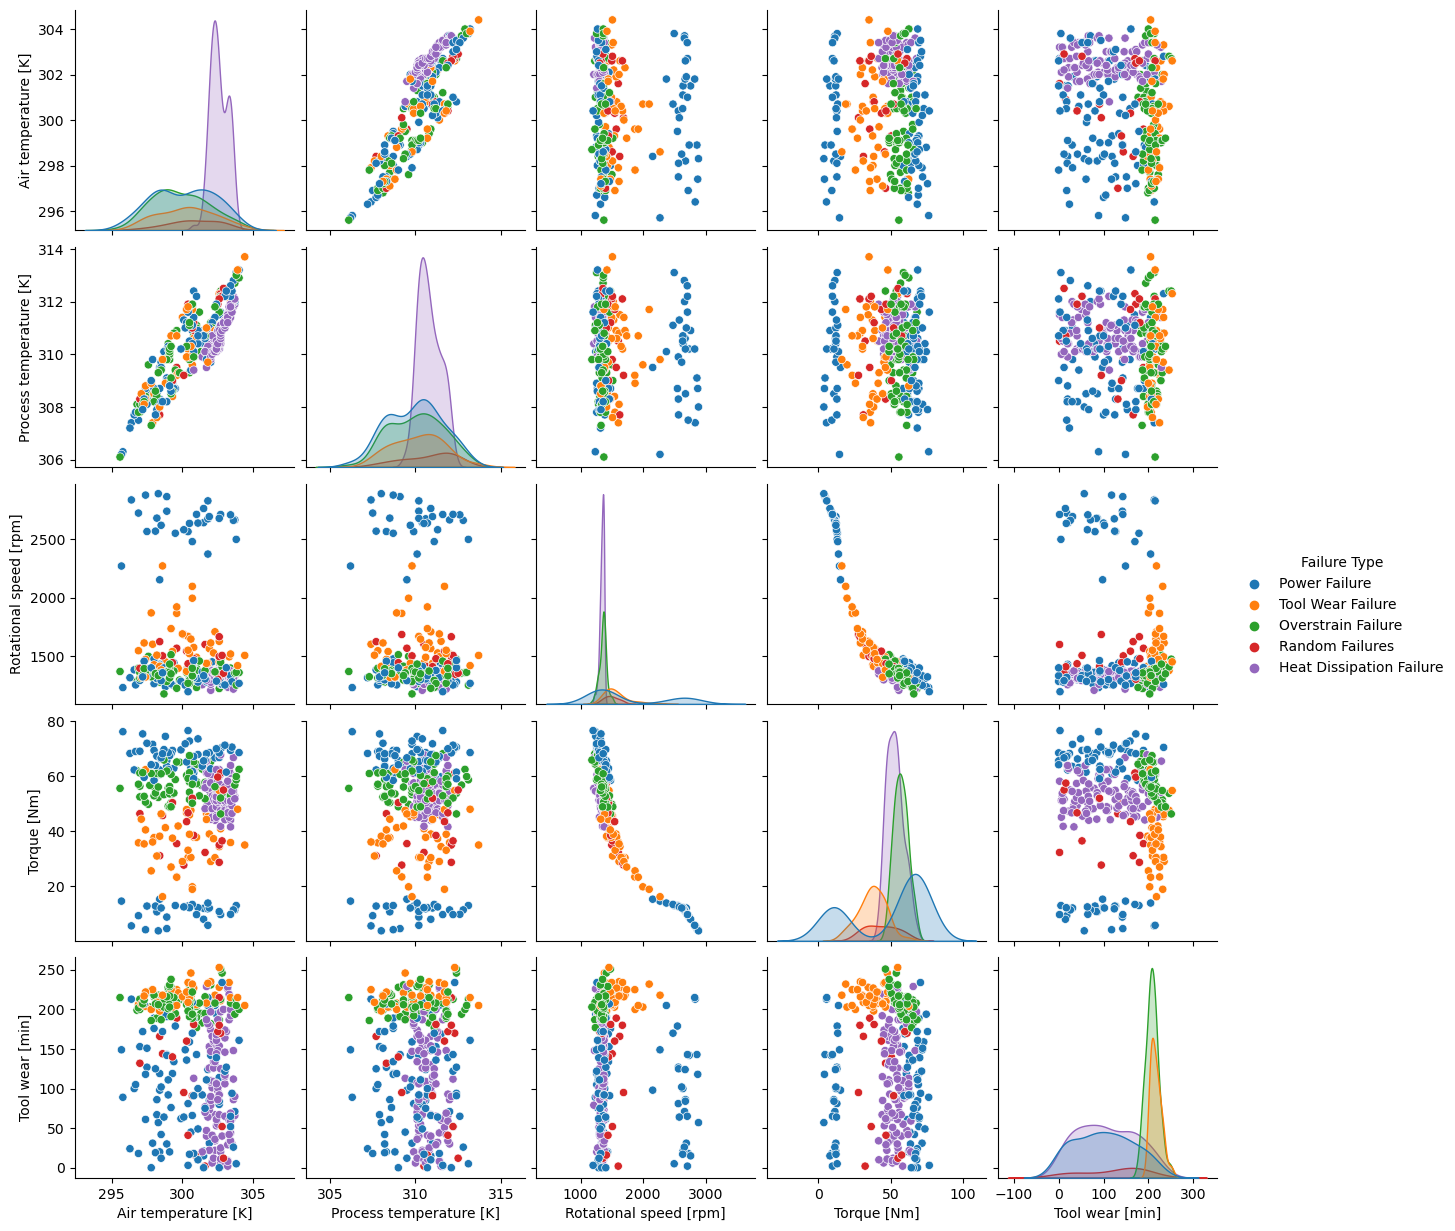

In [25]:
columns_to_plot = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

# Create pairplot
sns.pairplot(failure1[columns_to_plot + ["Failure Type"]], hue="Failure Type")
plt.show()

In [26]:
shuffled_data.drop(["Product ID"],axis=1,inplace=True)
shuffled_data

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2341,2406,L,299.1,308.7,1498,38.9,181,0,No Failure
3273,3359,L,301.5,310.6,1522,36.6,202,0,No Failure
5232,5482,L,302.6,312.0,1781,28.5,196,0,No Failure
8790,9122,L,297.3,308.3,1396,45.9,64,0,No Failure
1486,1531,L,298.1,309.0,1497,40.5,58,0,No Failure
...,...,...,...,...,...,...,...,...,...
3600,3694,L,302.1,311.3,1521,31.5,202,0,No Failure
782,802,L,296.9,307.8,1285,52.1,100,0,No Failure
6379,6658,L,301.4,310.3,1374,47.6,176,0,No Failure
7252,7550,L,300.3,311.4,1544,41.6,97,0,No Failure


In [27]:
# shuffled_data.drop("Product ID",axis=1,inplace=True)

target1=shuffled_data["Target"]

failure_type1=shuffled_data["Failure Type"]

shuffled_data.drop('Target',axis=1,inplace=True)

shuffled_data.drop('Failure Type',axis=1,inplace=True)

encodeded_df = pd.get_dummies(shuffled_data)

encodeded_df

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
2341,2406,299.1,308.7,1498,38.9,181,0,1,0
3273,3359,301.5,310.6,1522,36.6,202,0,1,0
5232,5482,302.6,312.0,1781,28.5,196,0,1,0
8790,9122,297.3,308.3,1396,45.9,64,0,1,0
1486,1531,298.1,309.0,1497,40.5,58,0,1,0
...,...,...,...,...,...,...,...,...,...
3600,3694,302.1,311.3,1521,31.5,202,0,1,0
782,802,296.9,307.8,1285,52.1,100,0,1,0
6379,6658,301.4,310.3,1374,47.6,176,0,1,0
7252,7550,300.3,311.4,1544,41.6,97,0,1,0


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(encodeded_df)
# scaled_data[0]

# Splitting Data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_data,target1,test_size=0.2, random_state=42)


# Model Selection

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

model=LogisticRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(accuracy_score(y_pred,y_test)*100)


86.01343342552352


In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2042
           1       0.61      0.75      0.67       489

    accuracy                           0.86      2531
   macro avg       0.77      0.82      0.79      2531
weighted avg       0.87      0.86      0.87      2531



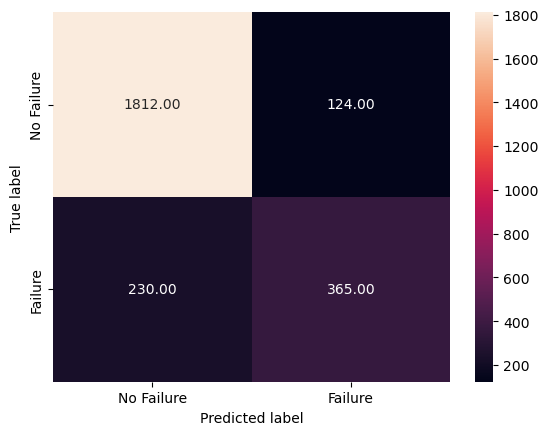

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [33]:
y_test.value_counts()

0    1936
1     595
Name: Target, dtype: int64

Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(accuracy_score(y_pred,y_test)*100)

98.77518767285657


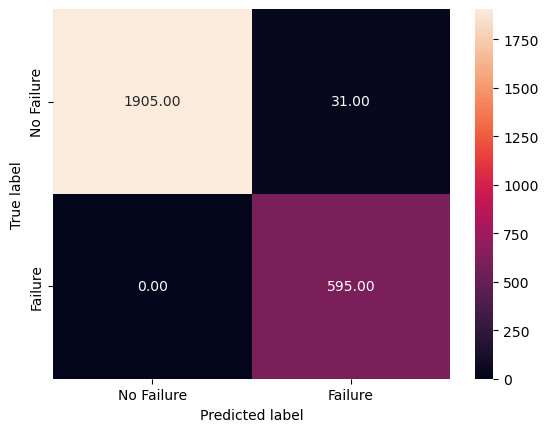

In [35]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1905
           1       1.00      0.95      0.97       626

    accuracy                           0.99      2531
   macro avg       0.99      0.98      0.98      2531
weighted avg       0.99      0.99      0.99      2531



Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(accuracy_score(y_pred,y_test)*100)

99.60489924930857


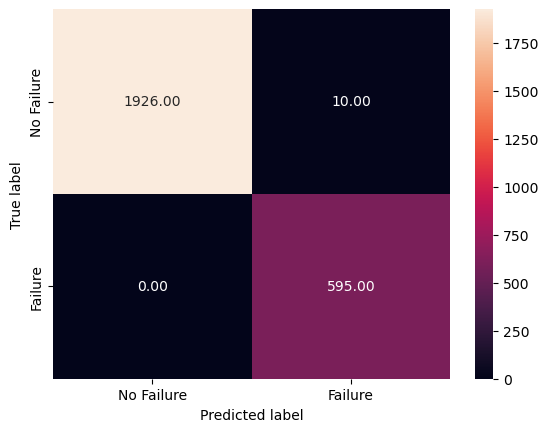

In [38]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1926
           1       1.00      0.98      0.99       605

    accuracy                           1.00      2531
   macro avg       1.00      0.99      0.99      2531
weighted avg       1.00      1.00      1.00      2531



In [40]:
user_data = {
    'UDI': 12356,
    'Air temperature [K]': 303.0,
    'Process temperature [K]': 311.2,
    'Rotational speed [rpm]': 1361,
    'Torque [Nm]': 47.6,
    'Tool wear [min]': 106,
    'Type_H': 0,
    'Type_L': 1,
    'Type_M': 0
}

user_features = [user_data['UDI'], user_data['Air temperature [K]'], user_data['Process temperature [K]'],
                 user_data['Rotational speed [rpm]'], user_data['Torque [Nm]'], user_data['Tool wear [min]'],
                 user_data['Type_H'], user_data['Type_L'], user_data['Type_M']]

# Step 3: Format the Data
user_input = [user_features]

# Step 4: Encode Categorical Variables (if necessary)
# (Apply the same encoding used during training)

# Step 5: Make Predictions
user_prediction = model.predict(user_input)

print(user_prediction)

if user_prediction[0] == 1:
    print("Failure")
else:
    print("No Failure")

[1]
Failure
